In [28]:
import pandas as pd
import numpy as np 
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from xgboost import plot_importance, plot_tree
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
import shap

In [2]:
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [5]:
X = data.drop('price', axis=1)  
y = data['sqft_living']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust the test_size and random_state as needed

In [16]:
X_test = X_test.drop('date', axis=1)

In [10]:
reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)  # Adjust the hyperparameters as needed
reg.fit(X_train, y_train, verbose=True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [13]:
yhat = reg.predict(X_test)

In [17]:
y_test

735      2070
2830     2900
4106     3770
16218    4560
19964    2550
         ... 
13674    1250
20377    2830
8805     2434
10168    2250
2522     2570
Name: sqft_living, Length: 4323, dtype: int64

In [18]:
rmse = np.sqrt(MSE(y_test, yhat))
print("RMSE : % f" %(rmse))

RMSE :  27.486413


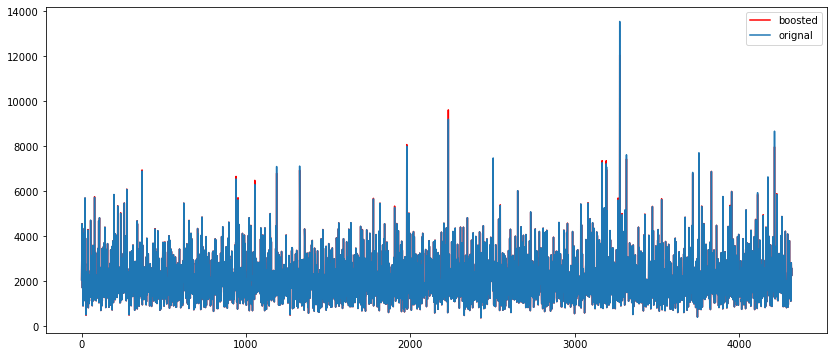

In [19]:
plt.subplots(figsize = (14,6))
plt.plot(yhat, color = 'red', label = 'boosted')
plt.plot(y_test.values, label = 'orignal')
plt.legend()

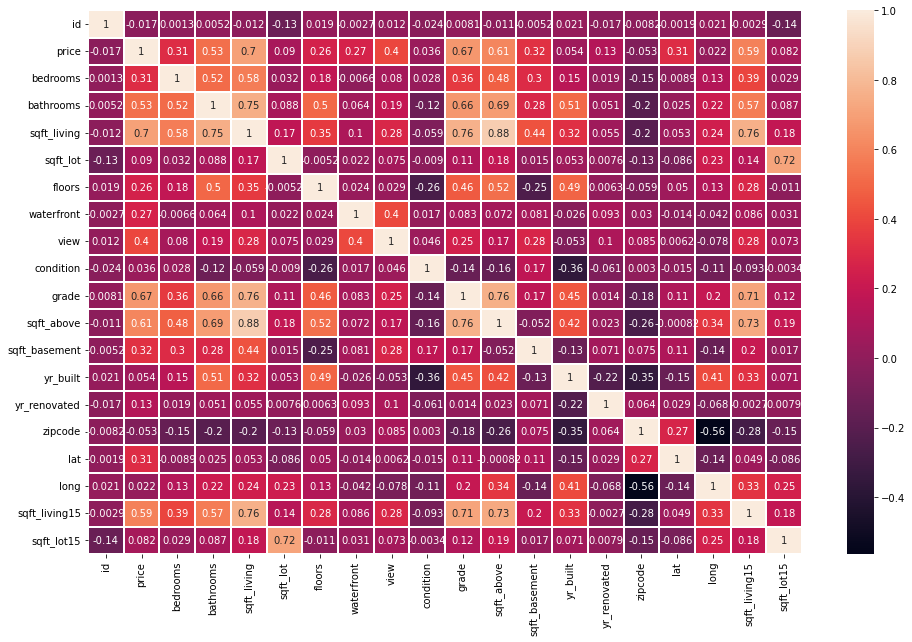

In [20]:
fig = plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, linewidth = 0.4)
plt.show()

## parameter optimization

In [21]:
from tqdm import tqdm
params = {
    'min_child_weight':[4,5],
    'gamma': [i /10.0 for i in range (3, 6)],
    'subsample': [i /10.0 for i in range (6, 11)],
    'colsample_bytree': [i /10.0 for i in range (6, 11)],
    'max_depth': [2, 3, 4]
}
xgb_reg = xgb.XGBRegressor(nthread=-1, objective= 'reg:squarederror')
grid = GridSearchCV(xgb_reg, params)
grid.fit(X_train, y_train)
gridcv_xgb = grid.best_estimator_
print(r2_score(y_test,gridcv_xgb.predict(X_test)))

0.9980799153948415


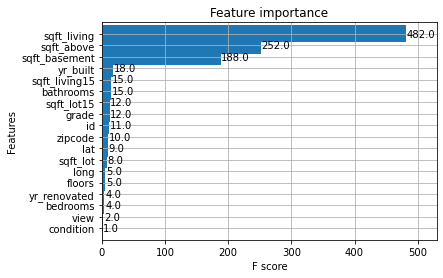

In [22]:
__ = plot_importance(gridcv_xgb, height = 1.5)

In [23]:
gridcv_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, nthread=-1, num_parallel_tree=None,
             predictor=None, ...)

In [24]:
yhat1 = grid.predict(X_test)

In [25]:
rmse = np.sqrt(MSE(y_test, yhat))
print("RMSE:%f" %(rmse))

RMSE:27.486413


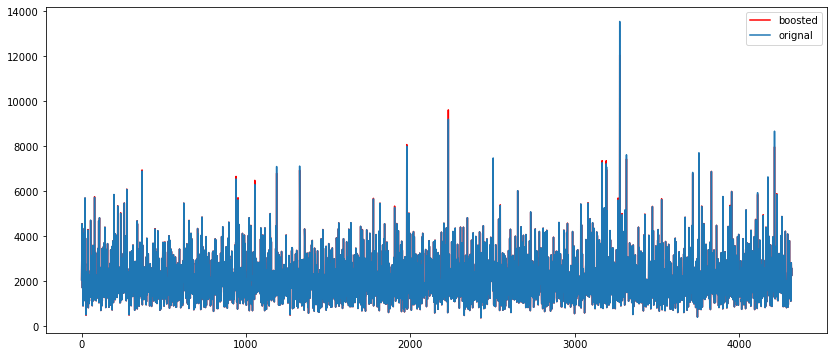

In [26]:
plt.subplots(figsize = (14,6))
plt.plot(yhat, color = 'red', label = 'boosted')
plt.plot(y_test.values, label = 'orignal')
plt.legend()

## summary plot

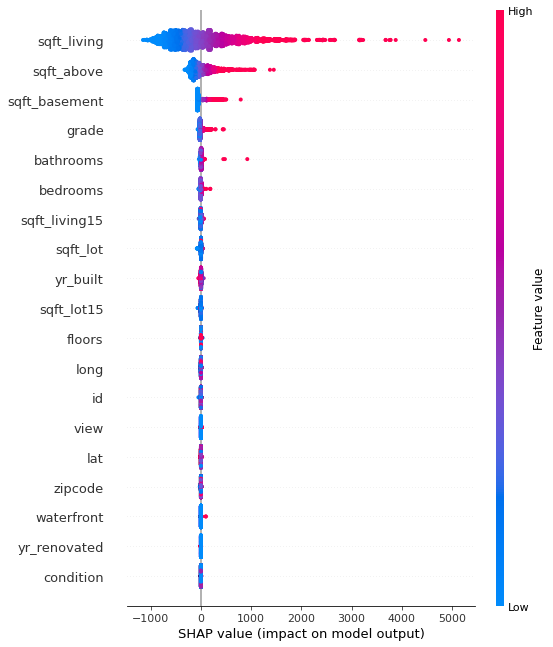

In [47]:
# Define the XGBoost parameters
params = {
    'colsample_bytree': 0.7,  # only 70% of the features are randomly sampled for each tree
    # other parameters...
}

# Train XGBoost model
model = xgb.XGBRegressor(**params)
model.fit(X_train, y_train)

# Create explainer
explainer = shap.Explainer(model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test)

In [55]:
feature_name = ['id', 'price', 'bedrooms', 'bathrooams', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_bbasement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'] 

## dependence plot

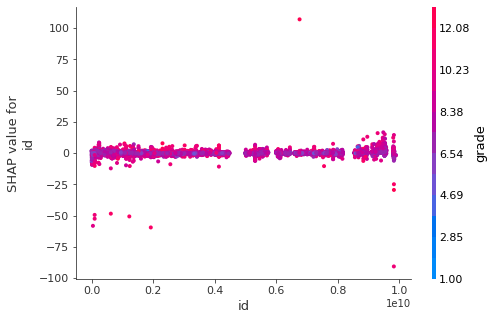

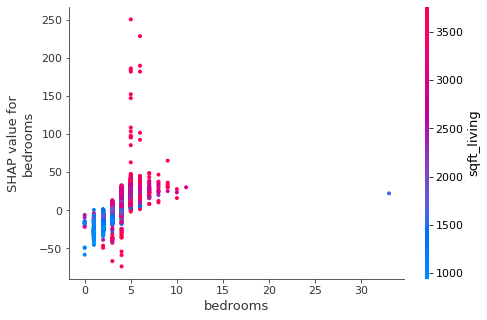

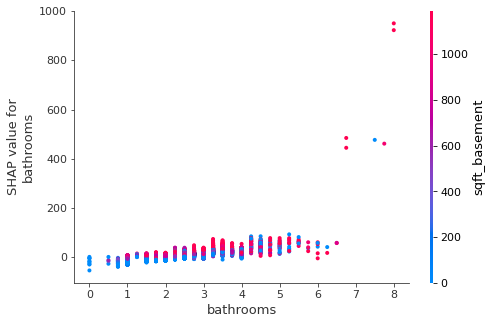

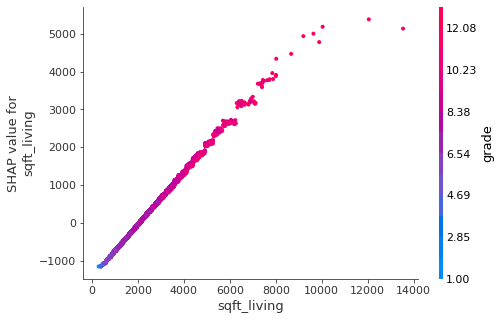

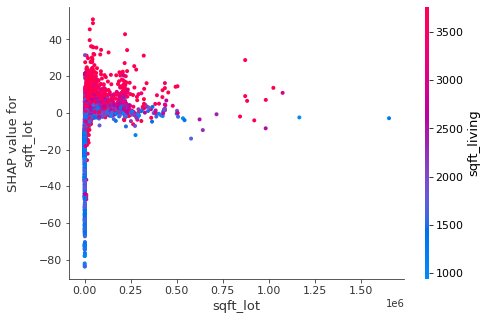

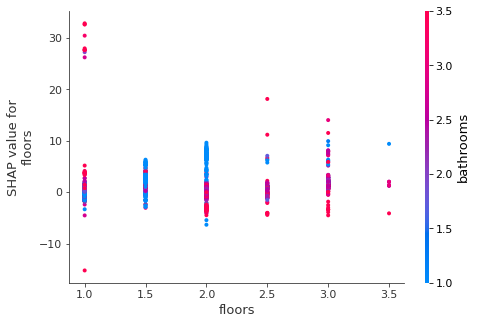

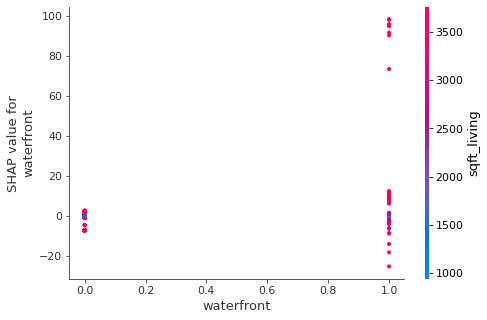

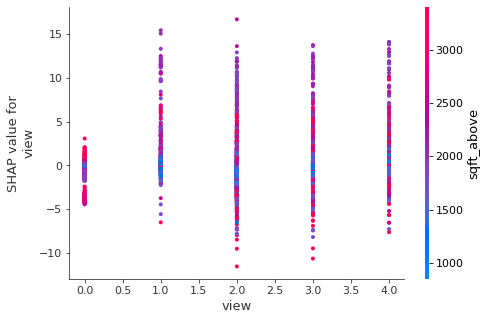

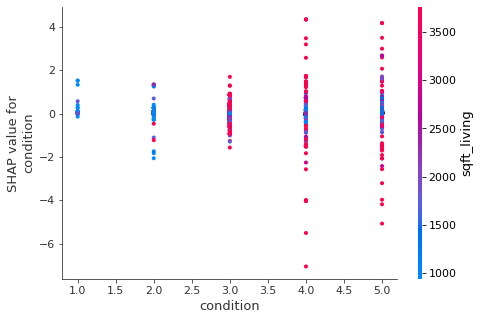

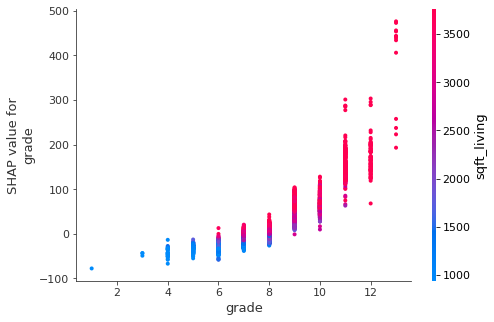

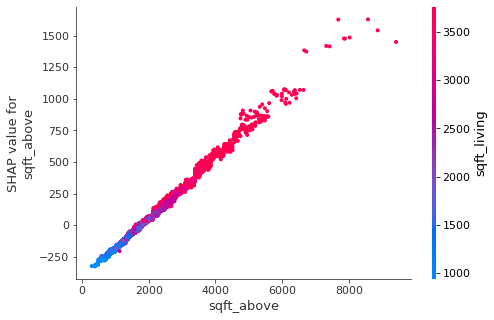

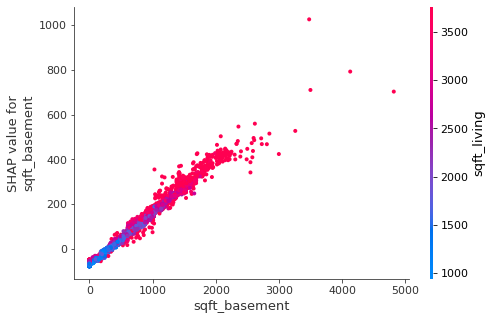

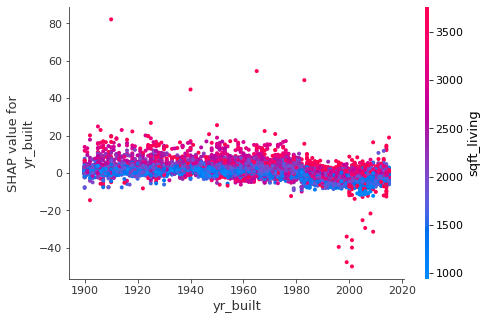

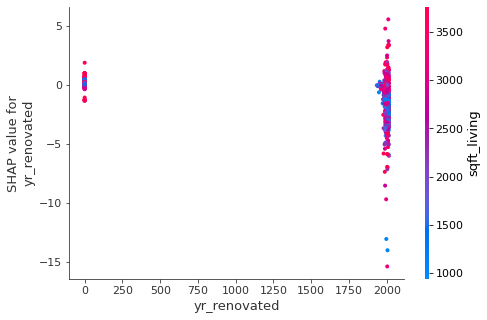

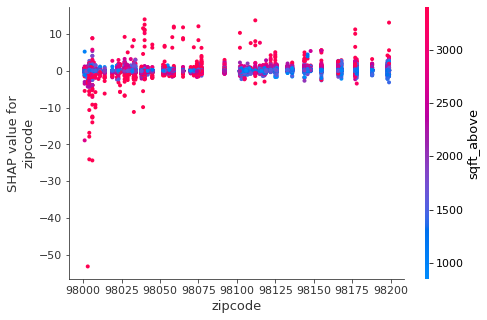

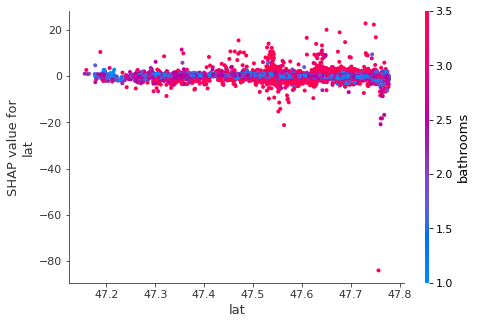

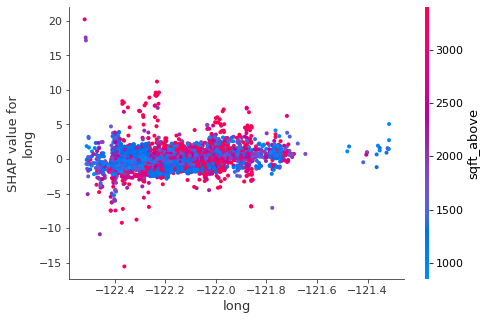

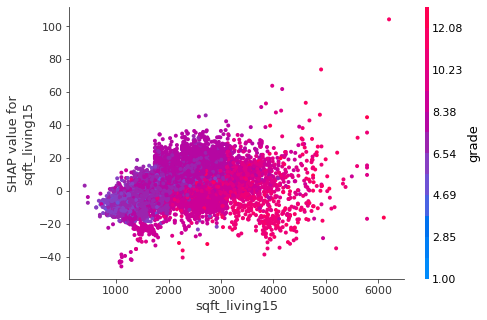

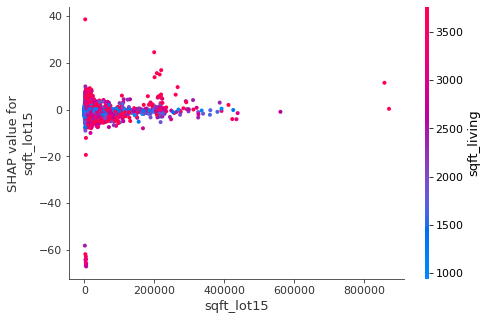

In [58]:
# Calculate SHAP values
shap_values = explainer.shap_values(X)

# Iterate over each feature
for feature_name in X.columns:
    # Plot dependence plot
    shap.dependence_plot(feature_name, shap_values, X)


In [57]:
X = X.drop("date", axis=1)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


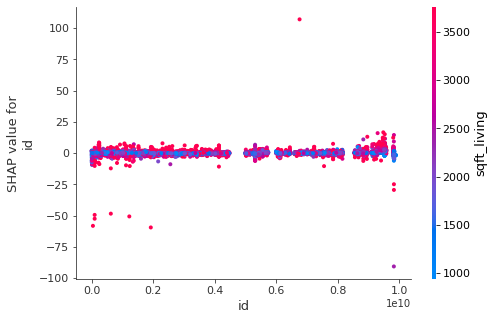

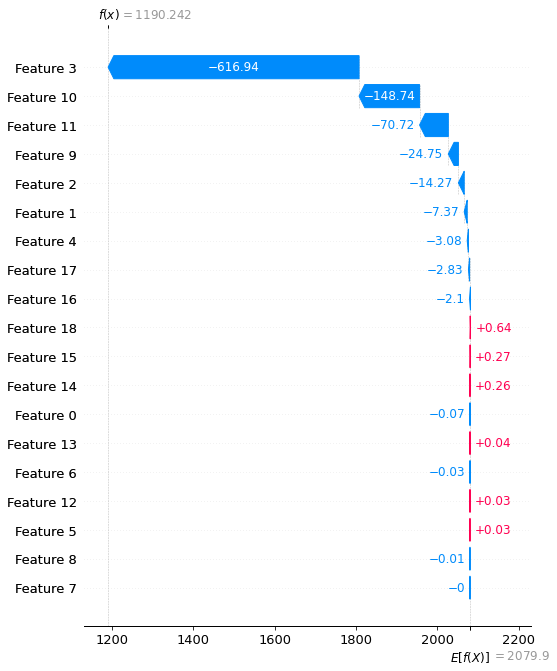

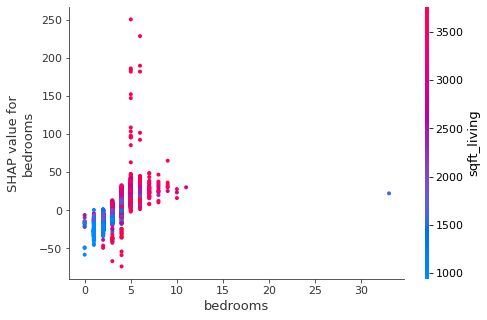

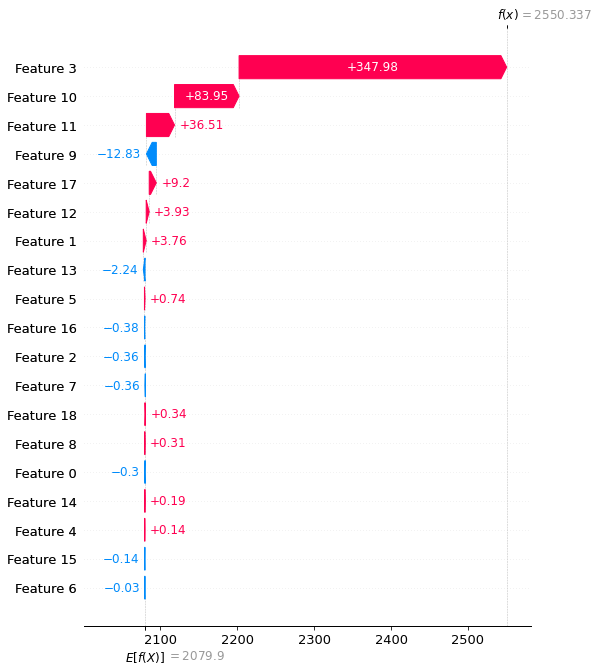

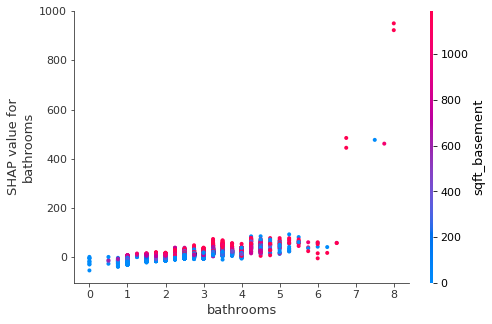

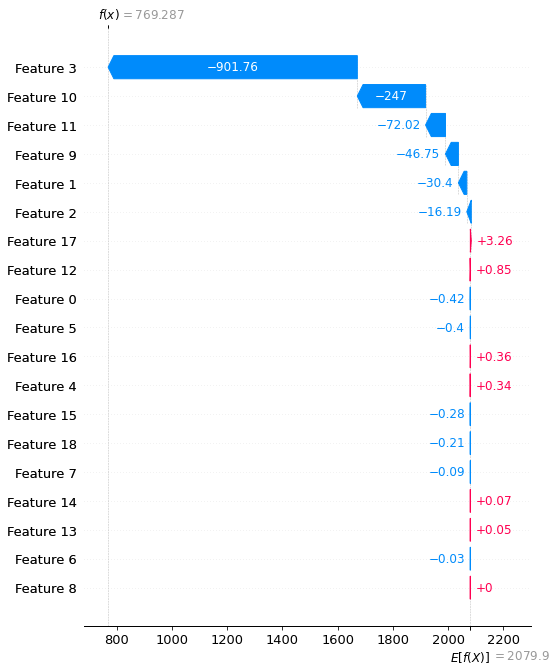

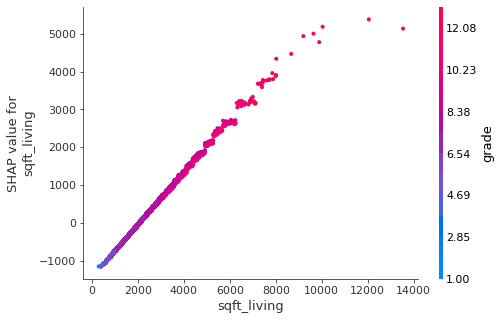

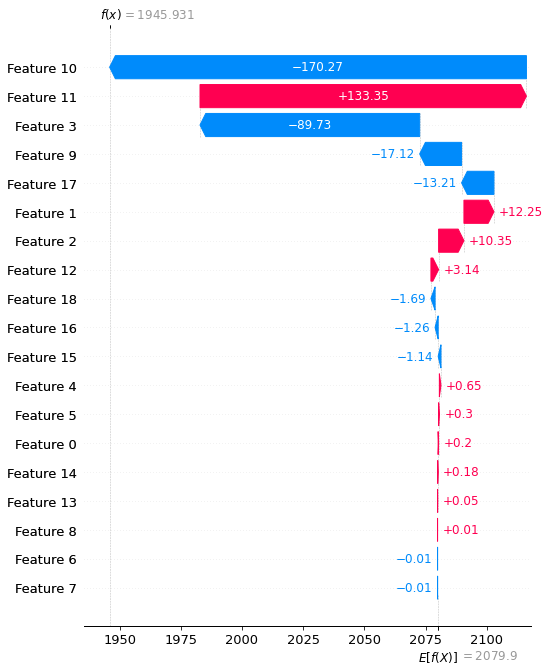

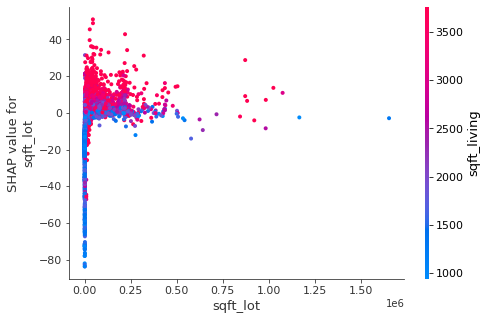

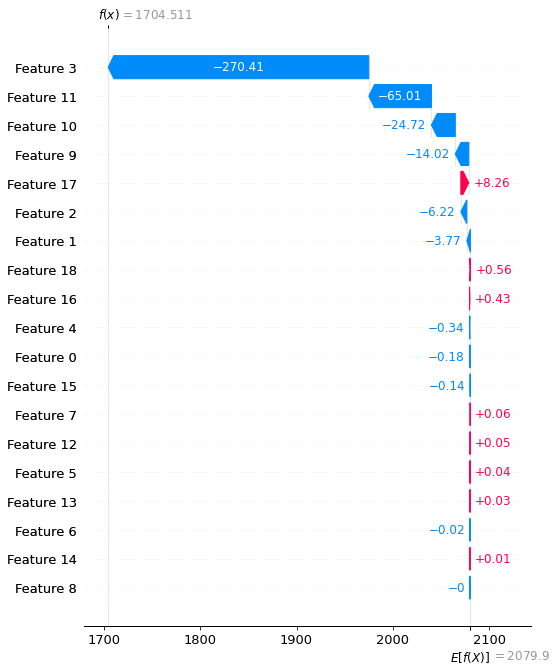

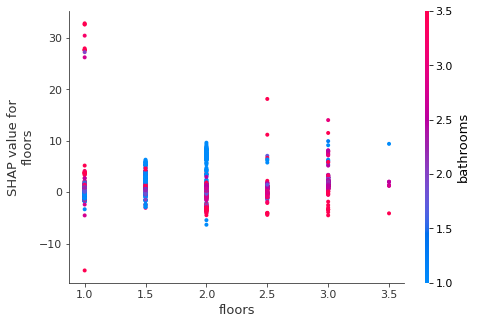

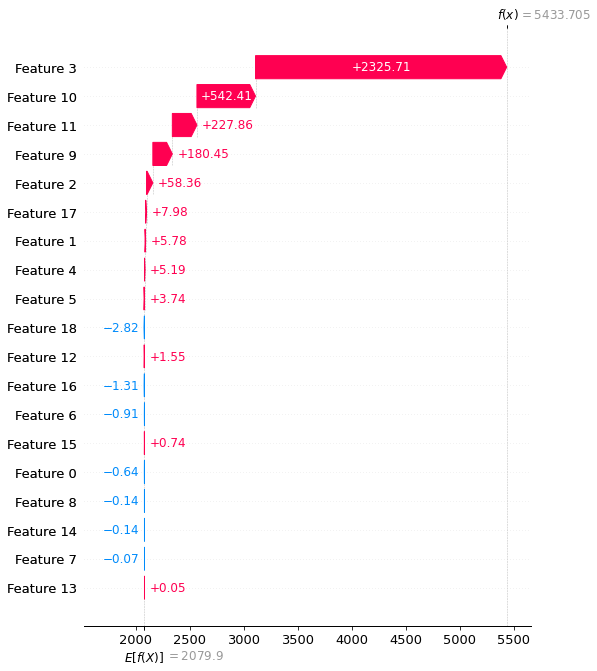

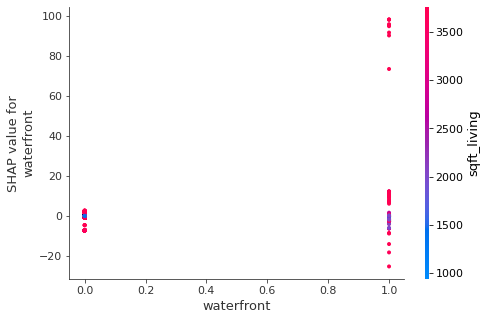

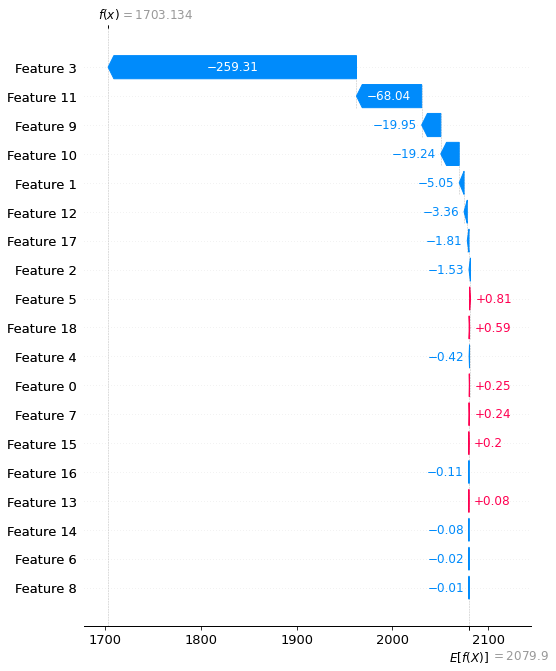

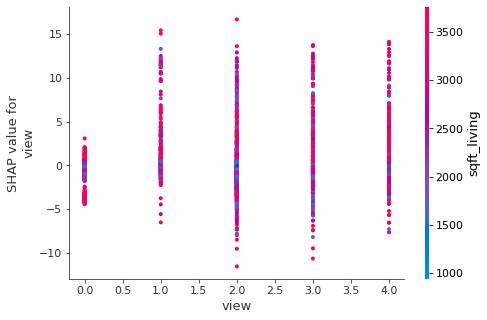

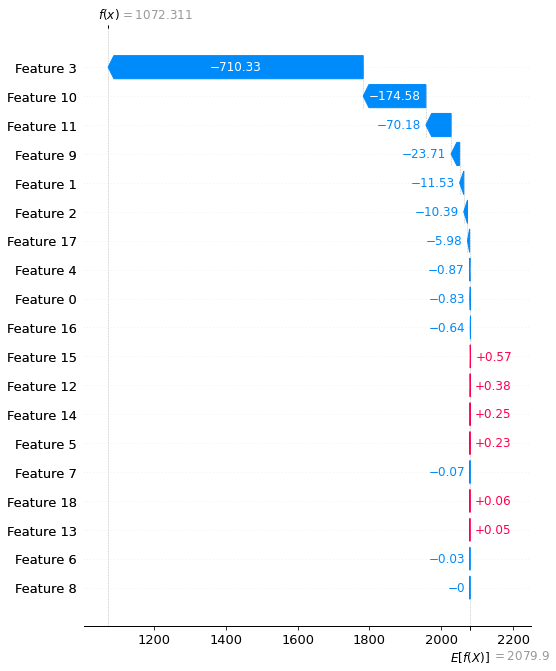

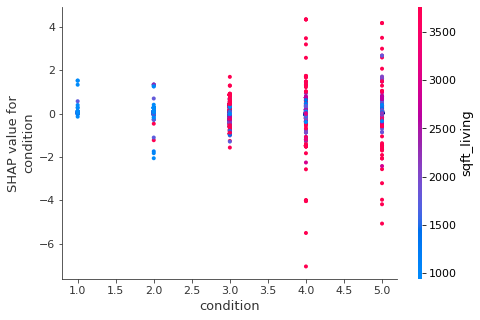

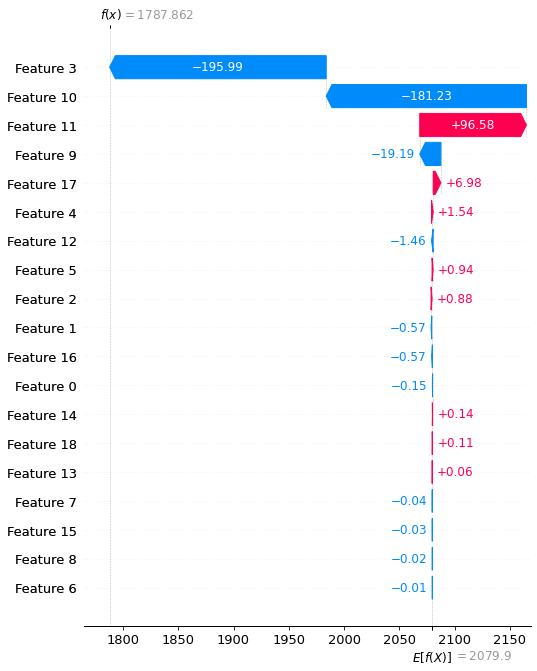

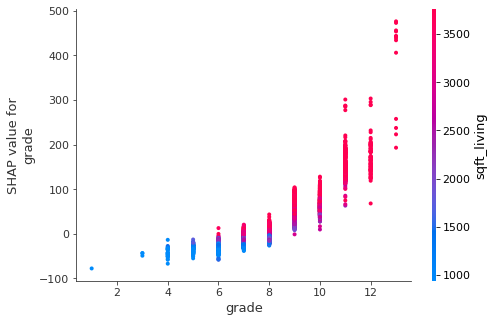

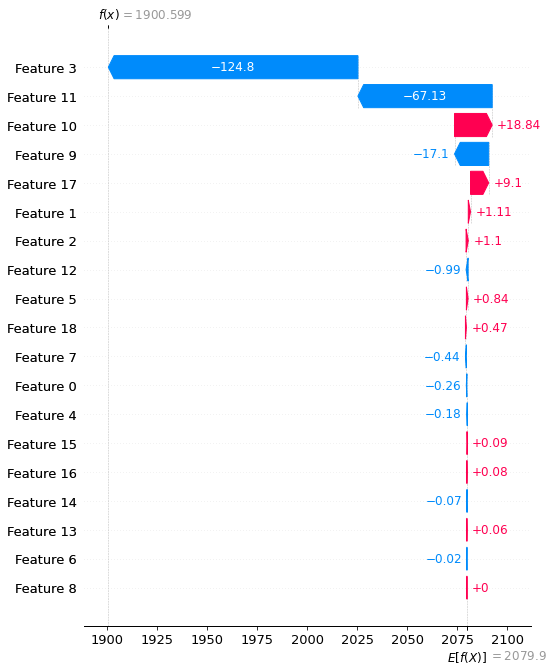

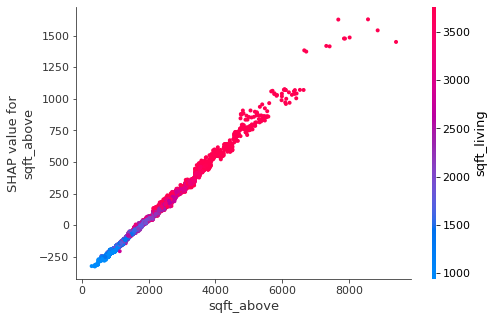

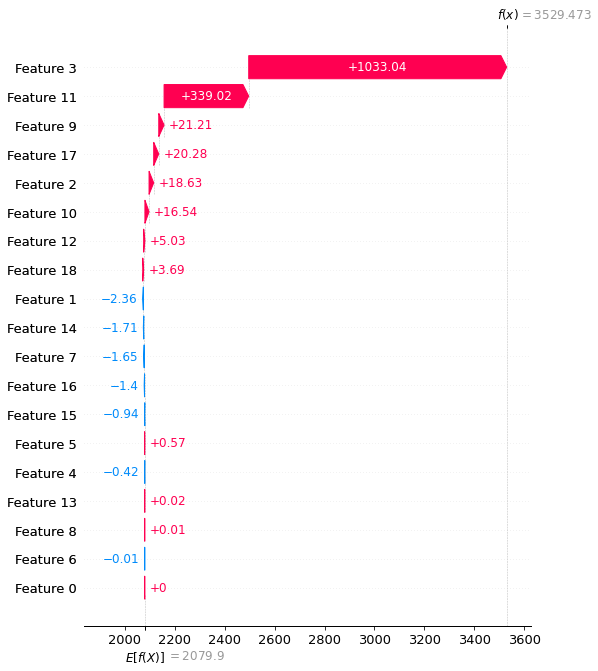

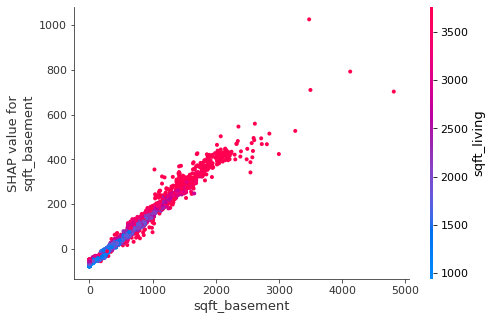

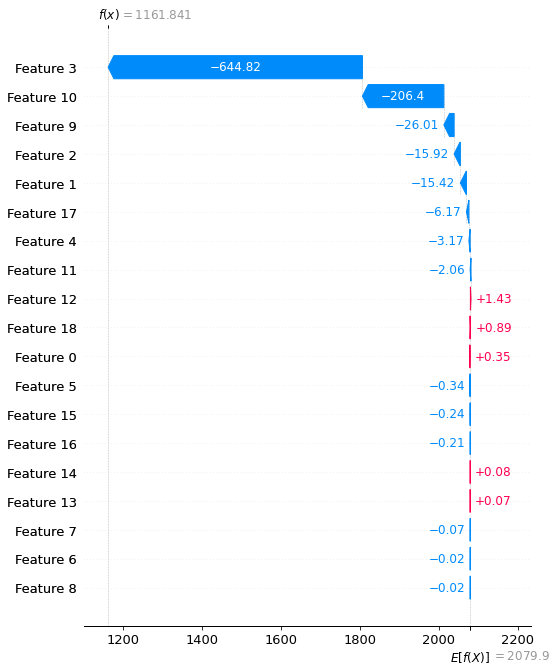

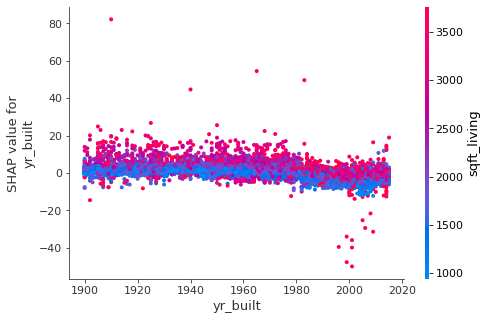

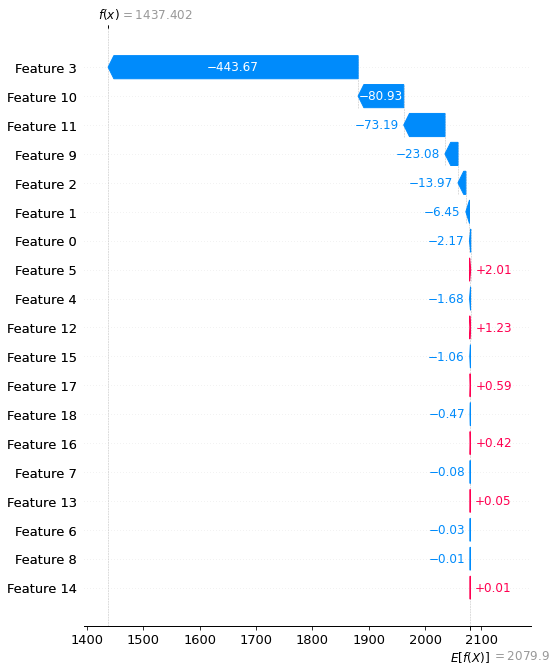

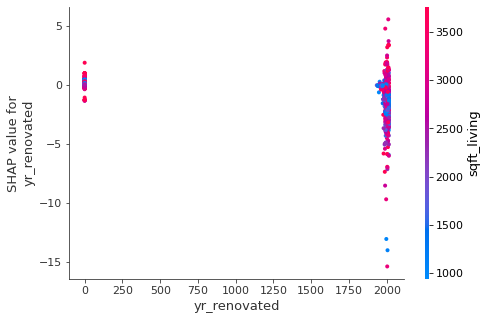

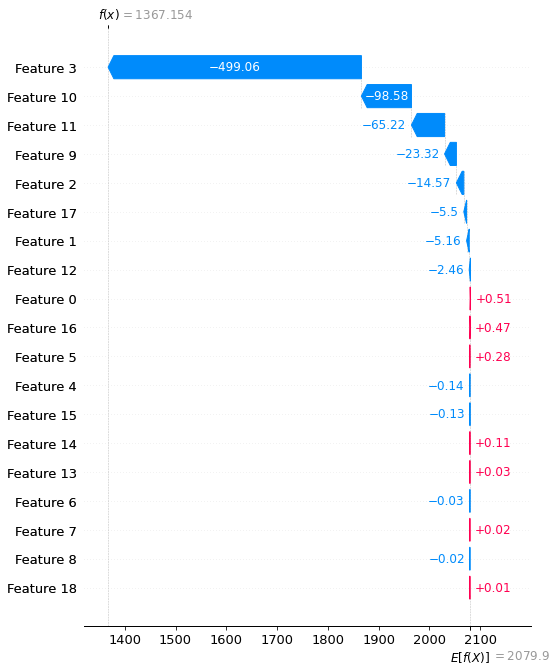

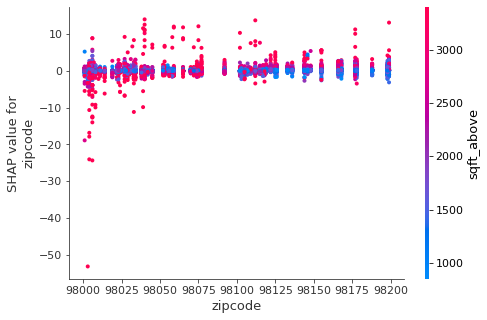

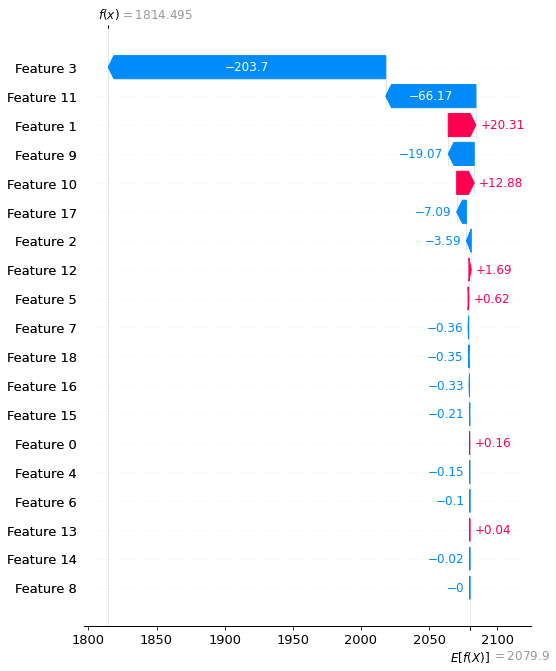

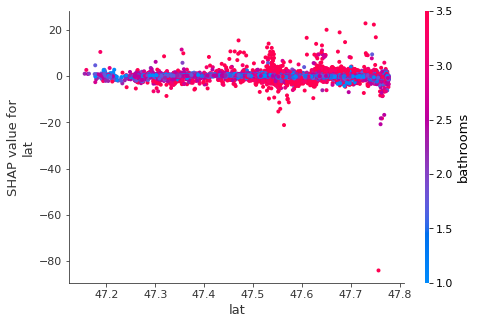

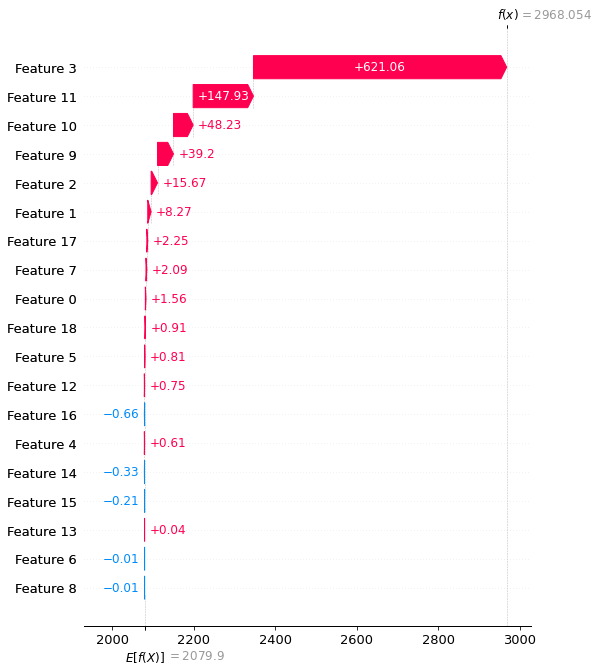

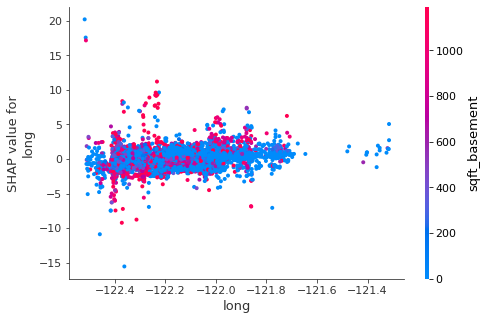

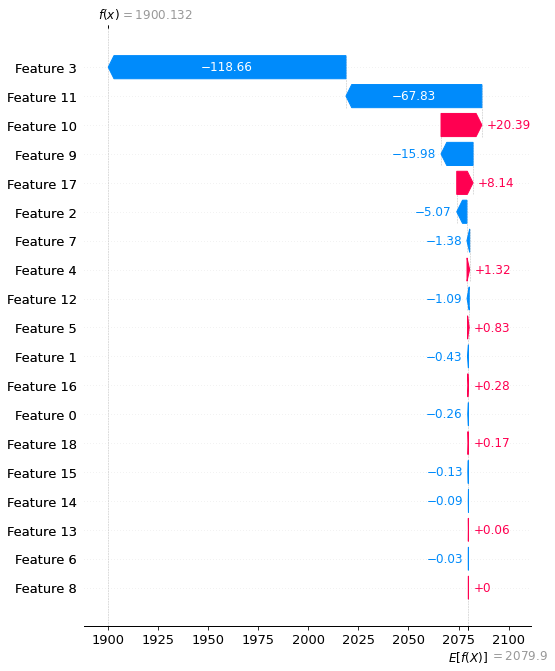

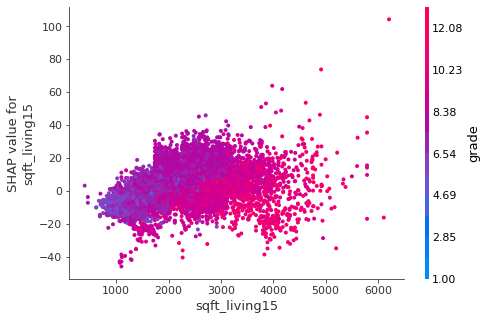

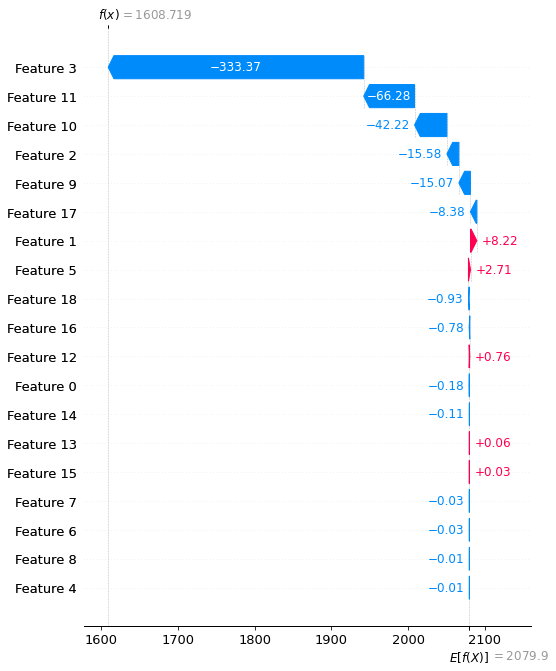

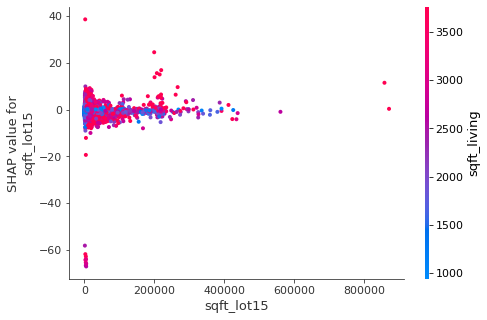

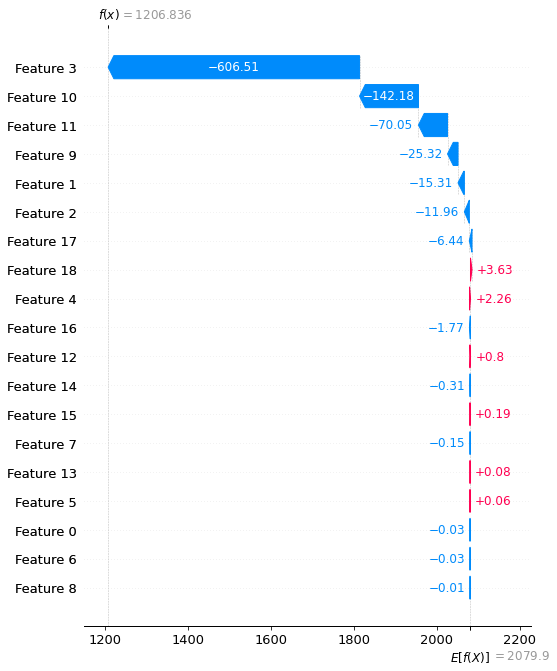

In [71]:
import shap

# Calculate SHAP values
shap_values = explainer.shap_values(X)

# Iterate over each feature
for feature_name in X.columns:
    # Plot dependence plot
    shap.dependence_plot(feature_name, shap_values, X)
    
    # Find the index of the selected feature
    feature_index = X.columns.get_loc(feature_name)

    # Create a shap.Explanation object for the current feature
    explanation = shap.Explanation(values=shap_values[feature_index], base_values=y.mean())
    
    # Plot waterfall plot for the current feature
    shap.plots.waterfall(explanation, max_display=20)
